# Optical Character Recognition (OCR) in Python
<br>
This repo contains the Optical Character Recognition (OCR) project as part of my data science portfolio. I have built an OCR to extract text from shopping receipts for further analysis, using two popular methods below:


1. [Tesseract-OCR](#tesseract)
2. [OCR.space](#space)

***
# <a name="tesseract">Tesseract-OCR</a>

Tesseract is an open source text recognizer (OCR) Engine, available under the Apache 2.0 license. Its development has been sponsored by Google since 2006. In 2006, Tesseract was considered one of the most accurate open-source OCR engines then available. Tesseract can be used directly, or (for programmers) using an API to extract printed text from images. It supports a wide variety of languages. In this project, I have used the Python-tesseract (pytesseract) which is a python wrapper for Tesseract-OCR.

**Steps:**
1. First, install Tesseract-OCR executables by selecting the version for your operating system [HERE](https://github.com/tesseract-ocr/tesseract/wiki). For Windows users, you can install the [Tesseract at UB Mannheim](https://github.com/UB-Mannheim/tesseract/wiki)
<br>
<br>
2. Install a Python wrapper. There are a few wrappers available for Anaconda users, the most popular one is [THIS](https://anaconda.org/jim-hart/pytesseract). You can run the following command in Anaconda prompt to install it:<br>
`conda install -c jim-hart pytesseract `
<br>
<br>
3. Pytesseract states that it requires Python Imaging Library (PIL). However this project no longer appears to be active, so I have used Pillow which is a PIL fork by Alex Clark and Contributors. It can be installed using:<br>
`conda install -c conda-forge pillow`


In [1]:
# import libraries
import pytesseract # OCR
from PIL import Image # read image

In [2]:
# set the path to the directory where you install the Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = "C:/Program Files (x86)/Tesseract-OCR/tesseract"

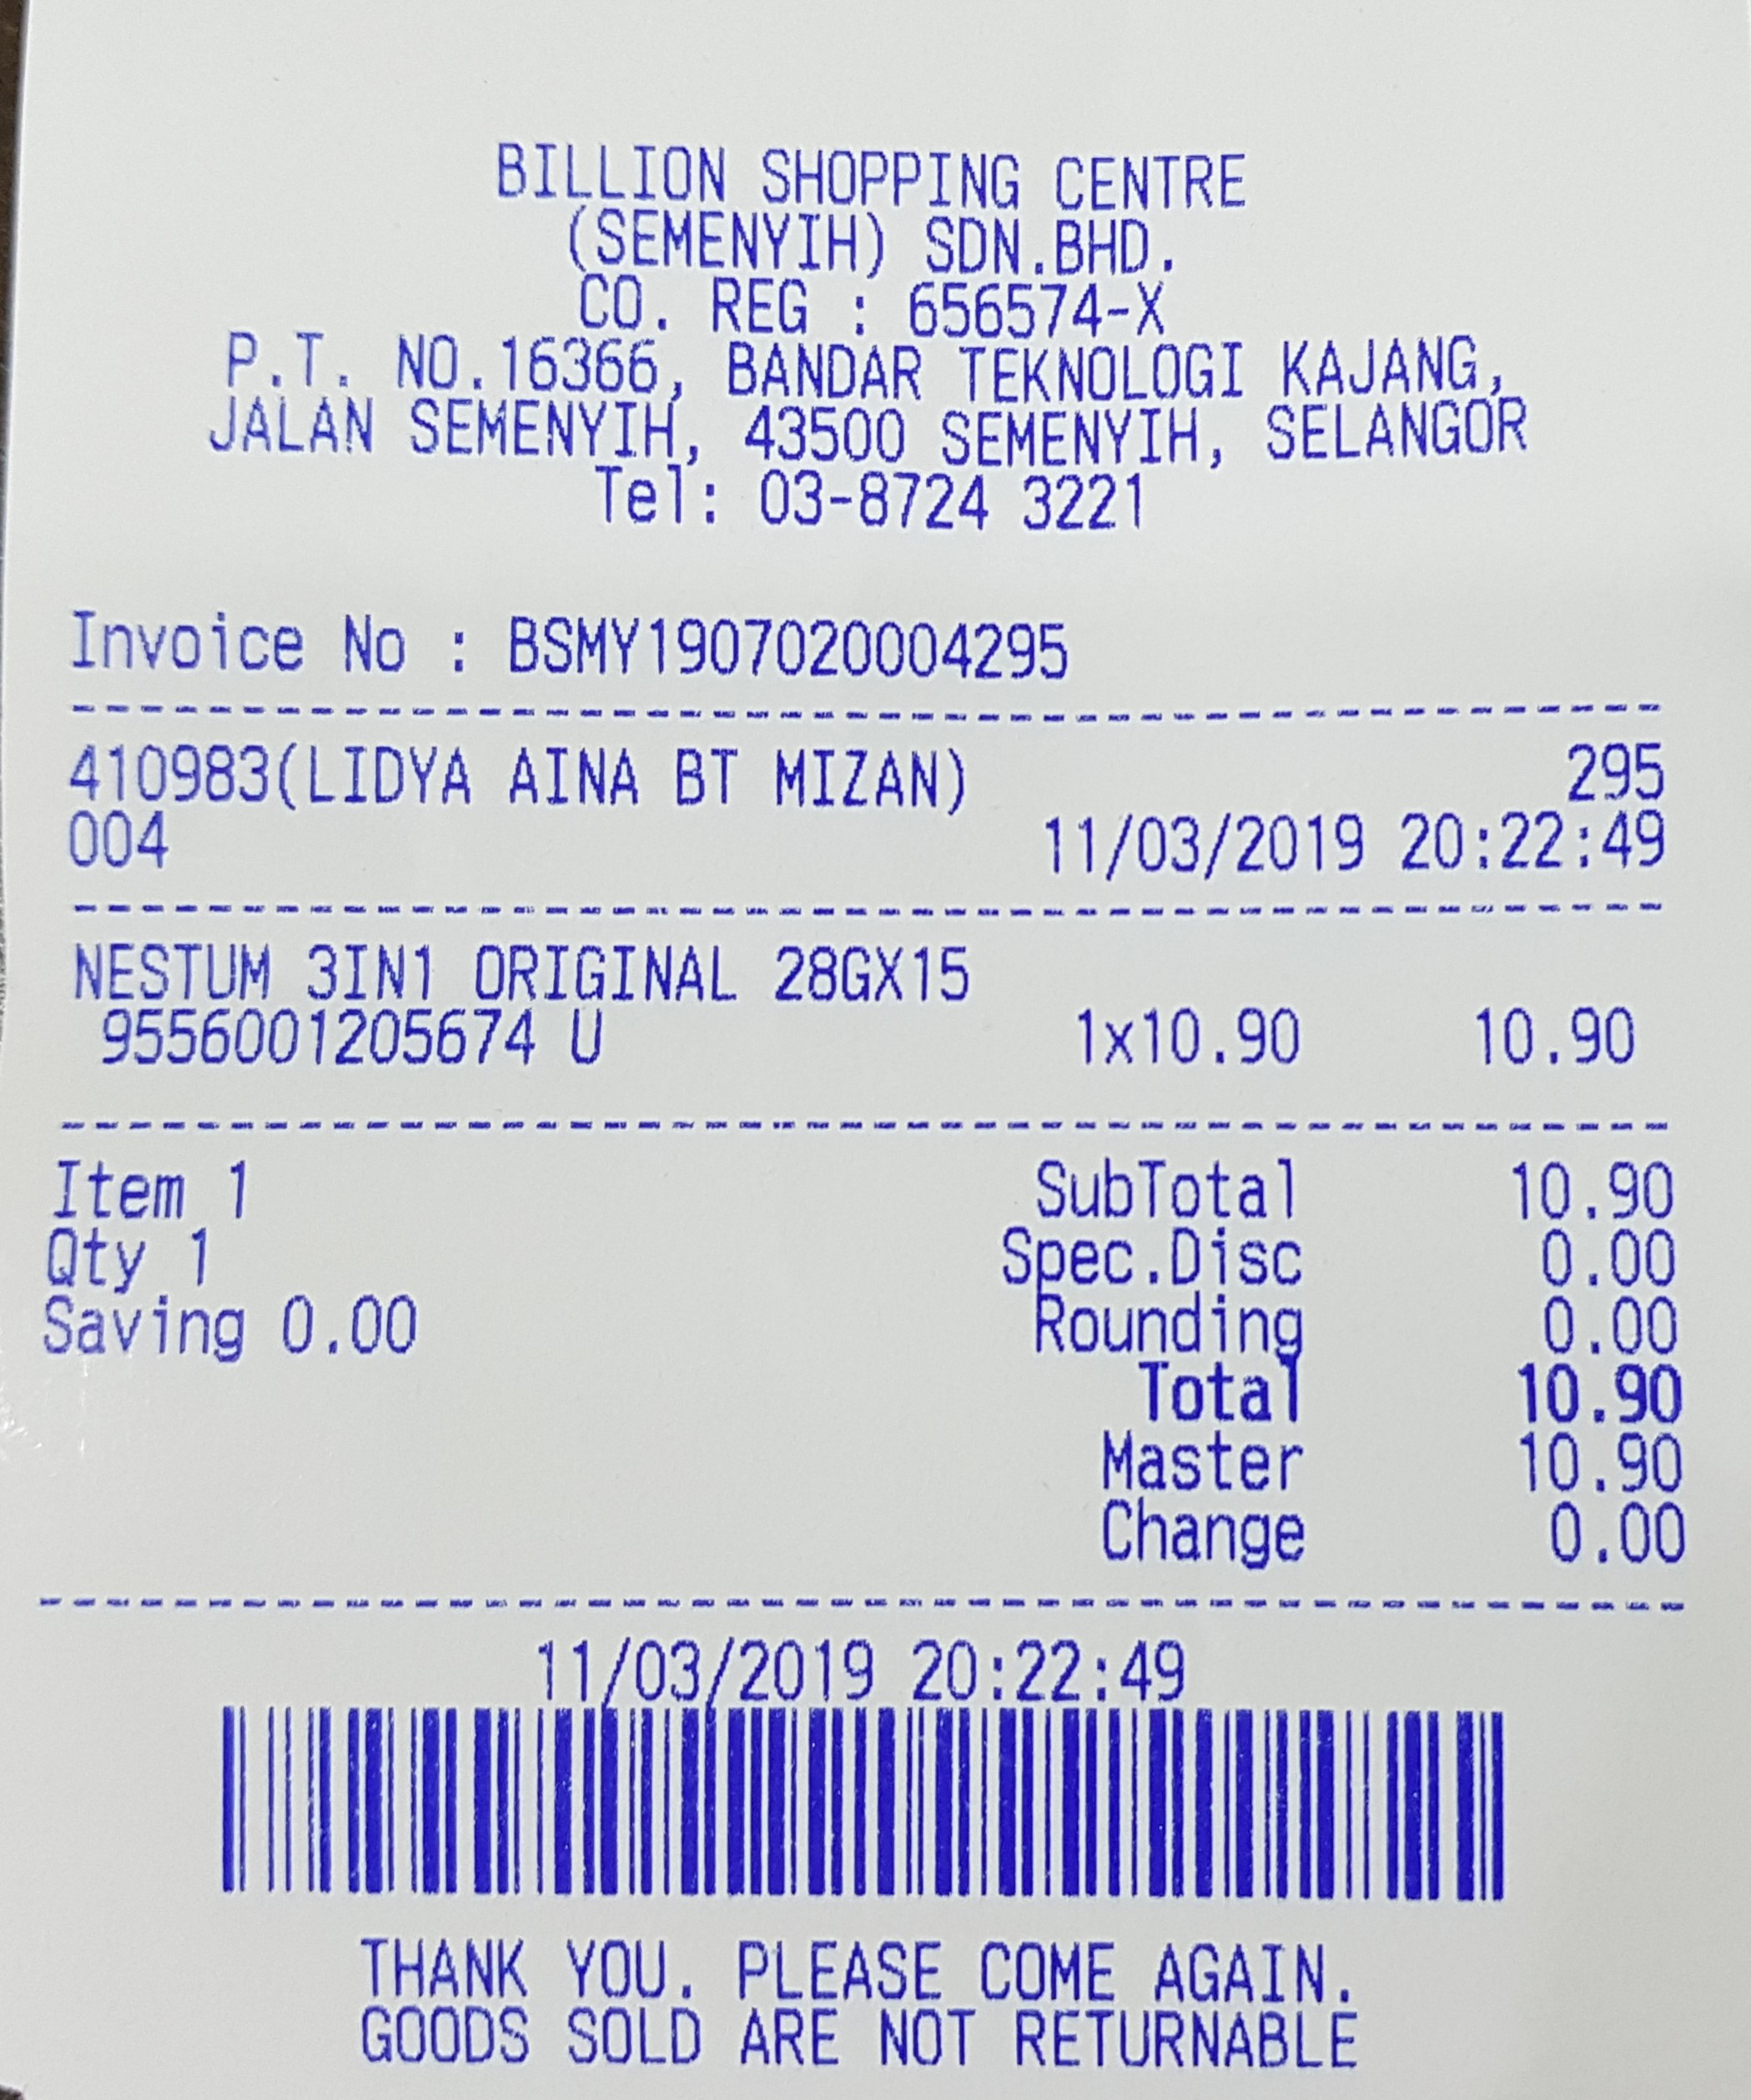

In [3]:
# open the image to make sure you are reading the correct image
img = Image.open("receipt.jpg")

# rotate the image if necessary
# img = img.rotate(270, expand=True) 

# view the image
img

In [4]:
# extract text from image
result = pytesseract.image_to_string(img)

In [5]:
# see the result
print(result)

BILLION SHOPPING CENTRE
(SEMENYIH) SDN .BHD.

CO. REG : 656574-X
P.T. NO.16366, BANDAR TEKNOLOGI KAJANG,
JALAN SEMEN, 43500 SEMENYIH, SELANGOR

03-8724 3221
Invoice No : BSMY1907020004295

_— =
—=—— ek ES ee eet ee es Se OY ne ee Om OP fe md ee Re ne em eo en ae

~ 410983(LIDYA AINA BT MIZAN) 299

004 11/03/2019 20:22:49
NESTUM 3IN1 ORIGINAL 28GX15

~ 9556001205674 U 1x10.90 10.90

Item | subTota| 10.90

Qty | SPeenH Se 0.00

Saving 0.00 ores 0.00

Tota 10.90

Master 10.90

Change 0.00

— tt eee fer ee a me Ma MN Lae A NS Gk AY A A RY A Lk Pr a A Ms

iti 19 20:22:49

THANK YOU. PLEASE COME AGAIN.
GOODS SOLD ARE NOT RETURNABLE



***
# <a name="space">OCR.space</a>

OCR.space is a free OCR API which provides a simple way of parsing images and multi-page PDF documents (PDF OCR) and getting the extracted text results returned in a JSON format. The API can be used from any internet-connected device (desktop, mobile, iPhone, Android, Windows phone, refrigerator etc). The OCR API has three tiers/levels. Registration is required to use the free tier with the OCR API key. It has a rate limit of 500 requests within one day per IP address to prevent accidental spamming. 

In [6]:
# use the code from the documentation page

import requests


def ocr_space_file(filename, overlay=False, api_key="API_KEY", language="eng"):
    """ OCR.space API request with local file.
        Python3.5 - not tested on 2.7
    :param filename: Your file path & name.
    :param overlay: Is OCR.space overlay required in your response.
                    Defaults to False.
    :param api_key: OCR.space API key.
                    Defaults to "helloworld".
    :param language: Language code to be used in OCR.
                    List of available language codes can be found on https://ocr.space/OCRAPI
                    Defaults to "en".
    :return: Result in JSON format.
    """

    payload = {"isOverlayRequired": overlay,
               "apikey": api_key,
               "language": language,
               }
    with open(filename, "rb") as f:
        r = requests.post("https://api.ocr.space/parse/image",
                          files={filename: f},
                          data=payload,
                          )
    return r.content.decode()


In [7]:
# send the image for text extraction
test_file = ocr_space_file(filename="receipt.jpg")

In [8]:
# parse the extracted text from the JSON response
import json
d = json.loads(test_file)
parsed_text = d['ParsedResults'][0]['ParsedText']

In [9]:
# see the result
print(parsed_text)

BILLION SHOPPING CENTRE 
(SEMENYIH) SDN.BHD, 
CO. REG 656574-X 
NO, 16366 TEKNOLOGI KAJANG, 
JALAN SEMENY1h(, 43500 SEMENYIH, SELANGOR 
Tel: 03-8724 3221 
Invoice No 
BSMY1907020004295 
410983(LIDYA AINA BT MIZAN) 
295 
11/03/2019 20 
004 
NESTIJM 31M ORIGINAL 28GX15 
9556001205674 U 
lxlO.90 
10,90 
0.00 
10.90 
10.90 
SubTota I 
Item I 
Spec,Disc 
Qty I 
Roundin 
Saving 0.00 
Totaq 
Master 
Change 
THANK YOU. PLEASE COME AGAIN. 
GOODS SOLD ARE NOT RETURNABLE 
0.00 



***
# Ending Note
This is a simple project to build an OCR to extract text from shopping receipts. There are other interesting applications as well, such as extracting text from medical reports for further analysis. It is part of the Data Collection / Acquisition process in the overall Data Science Workflow. If you have any feedback for this project, feel free to contact me via my [LinkedIn](https://www.linkedin.com/in/limchiahooi) or [GitHub Pages](https://limchiahooi.github.io).

***
### References
- https://github.com/tesseract-ocr/tesseract/wiki
- https://github.com/UB-Mannheim/tesseract/wiki
- https://stackoverflow.com/questions/34225927/pytesseract-cannot-find-the-file-specified/35830452
- https://grimhacker.com/2014/11/23/installing-pytesseract-practically-painless/
- https://medium.com/@MicroPyramid/extract-text-with-ocr-for-all-image-types-in-python-using-pytesseract-ec3c53e5fc3a